In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# 1. Load and Explore Dataset

df = pd.read_csv("Titanic-Dataset.csv")
print("Initial Shape:", df.shape)
print(df.head())
print(df.info())
print("Missing values:", df.isnull().sum())

Initial Shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8

In [17]:
# 2. Handle Missing Values

# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)
# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
# Drop Cabin due to high missing %
df.drop(columns=['Cabin'], inplace=True)


C:\Users\saiki\AppData\Local\Temp\ipykernel_11824\4115164330.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\saiki\AppData\Local\Temp\ipykernel_11824\4115164330.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [21]:
# 3. Encode Categorical Features

# Label Encoding for Sex
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
# One-hot Encoding for Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [23]:
# 4. Normalize / Standardize Numerical Features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

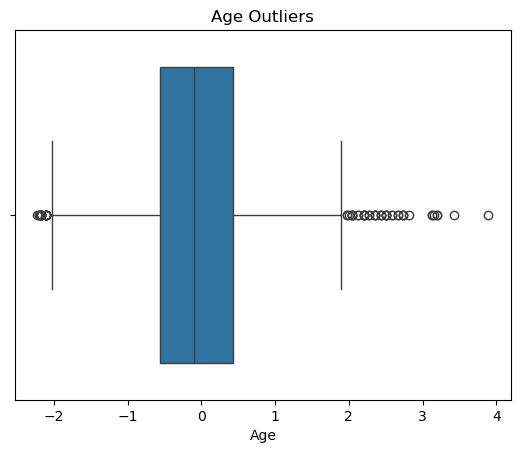

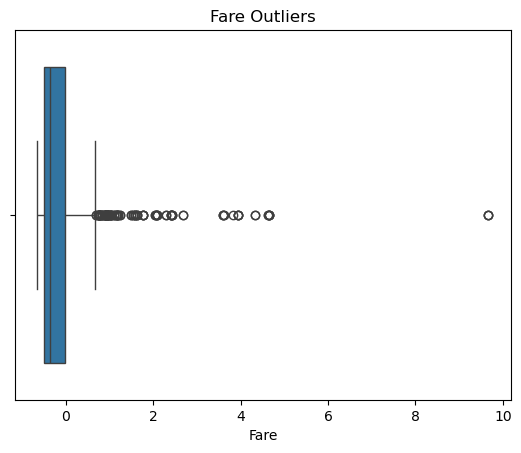

In [25]:
# 5. Detect & Remove Outliers

# Boxplot for Age and Fare
sns.boxplot(x=df['Age'])
plt.title("Age Outliers")
plt.show()

sns.boxplot(x=df['Fare'])
plt.title("Fare Outliers")
plt.show()
# Remove extreme Fare outliers (z-score > 3)
from scipy.stats import zscore
df = df[(np.abs(zscore(df[['Age', 'Fare']])) < 3).all(axis=1)]


In [29]:
# Save Cleaned Dataset

df.to_csv("titanic_cleaned.csv", index=False)
print(" Cleaning & preprocessing complete. Saved as 'titanic_cleaned.csv'")

 Cleaning & preprocessing complete. Saved as 'titanic_cleaned.csv'
